<h3 style="text-align: center">MNIST dataset training (I)</h3>
<h4 style="text-align: center">fully-connected network - pytorch</h4>

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
import matplotlib.pyplot as plt

import time

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #if color
                                transforms.Normalize((0.5,), (0.5,)),
                              ])


# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

<p>Compose creates a series of transformation to prepare the dataset.</p> 
<p>Torchvision reads datasets into PILImage (Python imaging format).</p> 
<p>ToTensor converts the PIL Image from range [0, 255] to a FloatTensor of shape (C x H x W) with range [0.0, 1.0].</p> 
<p>We then renormalize the input to [-1, 1] based on the following formula with μ=standard deviation=0.5.</p>

In [5]:
#dataiter = iter(trainloader)
#images, labels = dataiter.next()
#print(type(images))
#print(images.shape)
#print(labels.shape)
#%matplotlib inline
#print("labels",labels)
#plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');      

In [6]:
#model = nn.Sequential(nn.Linear(784, 128),
#                      nn.ReLU(),
#                      nn.Linear(128, 64),
#                      nn.ReLU(),
#                      nn.Linear(64, 10),
#                      nn.LogSoftmax(dim=1))

#criterion = nn.NLLLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.003)

# Use GPU if it's available
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print("using:",device)

#for device in ['cpu', 'cuda']:

#    start = time.time()
    
#    model.to(device)
    
#    epochs = 3
#    for e in range(epochs):
#        print("epoch",e)
#        running_loss = 0
#        for images, labels in trainloader:
            #images = images.to(device)
            #labels = labels.to(device)
#            images, labels = images.to(device), labels.to(device)        
            
            # Flatten MNIST images into a 784 long vector
#            images = images.view(images.shape[0], -1)
    
            # TODO: Training pass
#            optimizer.zero_grad()
         
#            output = model(images)
#            loss = criterion(output, labels)
       
#            loss.backward()
#            optimizer.step()
        
#            running_loss += loss.item()
#        else:
#            print("Training loss:", running_loss/len(trainloader))
#            print(loss)

#    print("==>",device, time.time() - start)

In [8]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("using:",device)

model.to(device)
    
epochs = 10
for e in range(epochs):
    print("epoch",e)
    running_loss = 0
    for images, labels in trainloader:
        #images = images.to(device)
        #labels = labels.to(device)
        images, labels = images.to(device), labels.to(device)        
            
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
 
        # TODO: Training pass
        optimizer.zero_grad()
         
        output = model(images)
        loss = criterion(output, labels)
       
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Training loss:", running_loss/len(trainloader))
        print(loss)


using: cuda
epoch 0
Training loss: 1.8353474710795925
tensor(1.0960, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 1
Training loss: 0.7973223469976677
tensor(0.5507, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 2
Training loss: 0.5152868412609802
tensor(0.2985, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 3
Training loss: 0.42452582486593393
tensor(0.3563, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 4
Training loss: 0.3811920700646413
tensor(0.4300, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 5
Training loss: 0.354966407971405
tensor(0.2881, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 6
Training loss: 0.3359381866607585
tensor(0.2992, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 7
Training loss: 0.3210939739320451
tensor(0.2612, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 8
Training loss: 0.30830734365307955
tensor(0.5859, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 9
Training loss: 0.2974940584793782
tensor(0.7527, device='cuda:0', grad

In [9]:
model.to("cpu")
images, labels = images.to("cpu"), labels.to("cpu")

In [10]:
#model.state_dict().keys()
torch.save(model.state_dict(), 'checkpoint-mnist-10.pth')
#state_dict = torch.load('checkpoint1-dropout.pth')
#print(state_dict.keys())
#model.load_state_dict(state_dict)

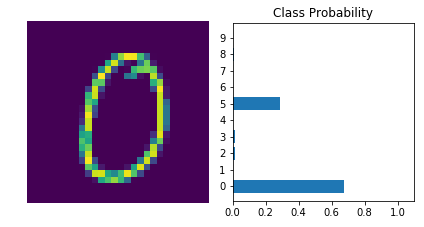

In [11]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

# flatten structure above
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
# get back softmax without log
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

<p>Reference:</p>
    
<a href='https://www.udacity.com/course/deep-learning-pytorch--ud188'>Udacity: Intro to deep learning with PyTorch</a>